In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# MNIST adat betöltése
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normálás (0-255 közötti pixelek -> 0-1 közé)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Formázás: neurális hálónak 4D kell (batch, height, width, channels)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.9052 - loss: 0.3186 - val_accuracy: 0.9765 - val_loss: 0.0764
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9826 - loss: 0.0580 - val_accuracy: 0.9840 - val_loss: 0.0600
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9832 - val_loss: 0.0574
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9923 - loss: 0.0237 - val_accuracy: 0.9873 - val_loss: 0.0565
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9863 - val_loss: 0.0571


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9808 - loss: 0.0570
Test accuracy: 0.98


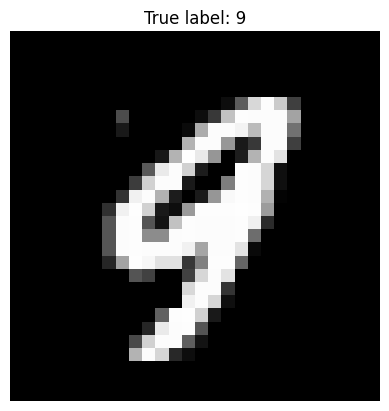

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Model prediction: 9


In [7]:
# Select a random image from the test dataset
idx = np.random.randint(0, len(x_test))
image = x_test[idx]
label = y_test[idx]

# Display the image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"True label: {label}")
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction = model.predict(image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print(f"Model prediction: {predicted_label}")
